In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [3]:
from tensorflow.keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os

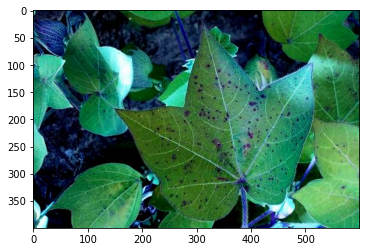

In [4]:
train_path= '/content/drive/MyDrive/set-2/train'
valid_path= '/content/drive/MyDrive/set-2/test'

categories= ["bacterial_blight","curl_virus","fussarium_wilt","healthy"]

for category in categories :
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data = []

def create_training_data():
    for category in categories :
        path = os.path.join(train_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (224,224))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [6]:
create_training_data()

In [7]:
len(training_data)

1442

In [8]:
test_data = []

def create_test_data():
     for category in categories :
        path = os.path.join(valid_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
          try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (224,224))
                test_data.append([new_array, class_num])
          except Exception as e:
              pass
          

In [9]:
create_test_data() 

In [10]:
len(test_data)

343

In [11]:
import random 
random.shuffle(training_data)
random.shuffle(test_data)

In [12]:
X_train= []
y_train= []

for feature,label in training_data:
    X_train.append(feature)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1,224,224,3)

In [13]:
y_train=np.array(y_train).reshape(-1,1)
y_train = to_categorical(y_train, num_classes=4)

In [14]:
X_train.shape, y_train.shape

((1442, 224, 224, 3), (1442, 4))

In [15]:
X_test= []
y_test= []

for feature,label in test_data:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1,224,224,3)

In [16]:
y_test= np.array(y_test).reshape(-1,1)
y_test = to_categorical(y_test, num_classes=4)

In [17]:
X_test.shape, y_test.shape

((343, 224, 224, 3), (343, 4))

In [18]:
X_train=X_train/255.0
X_test=X_test/255.0

In [19]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [20]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train.shape[1:])
base_model.trainable = False ## Not using trainable weights cause we will train out own

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')

In [23]:
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 16,320,644
Trainable params: 1,605,956
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
46/46 [==============================] - 24s 250ms/step - loss: 0.9673 - accuracy: 0.6761 - val_loss: 0.3385 - val_accuracy: 0.9067
Epoch 2/10
46/46 [==============================] - 8s 179ms/step - loss: 0.1966 - accuracy: 0.9480 - val_loss: 0.3193 - val_accuracy: 0.9038
Epoch 3/10
46/46 [==============================] - 8s 181ms/step - loss: 0.0811 - accuracy: 0.9868 - val_loss: 0.1384 - val_accuracy: 0.9563
Epoch 4/10
46/46 [==============================] - 8s 182ms/step - loss: 0.0293 - accuracy: 0.9993 - val_loss: 0.1268 - val_accuracy: 0.9592
Epoch 5/10
46/46 [==============================] - 8s 183ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.1136 - val_accuracy: 0.9650
Epoch 6/10
46/46 [==============================] - 8s 185ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9650
Epoch 7/10
46/46 [==============================] - 8s 185ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9708
Epoch

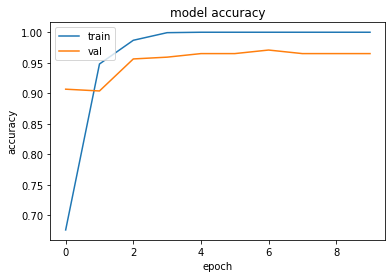

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

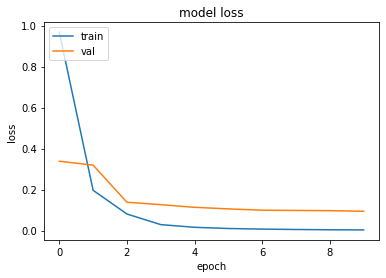

In [28]:
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
model.save('/content/drive/MyDrive/set-2/Colab_VGG.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/set-2/Colab_VGG.model/assets
